In [26]:
%matplotlib inline
import numpy as np

In [27]:
import learnpep as lp
from learnpep import data, features, plot

import sklearn

In [39]:
charge = lp.features.SequenceCharge("amino-acid-data-table.csv",window_size=3)
main_features = lp.features.SequenceMain("amino-acid-data-table.csv",window_size=3)

ml = lp.data.MachineLearnerData("0.000uM.txt")
#ml = lp.data.MachineLearnerData("test")
ml.add_feature(charge)
ml.add_feature(main_features)


In [40]:
ml.remove_filters()
ml.remove_classes()
#ml.add_classes([-5,0,5])
#ml.add_cutoff_filter(">",-2)

n: 20, r2: 0.197


IndexError: index out of bounds

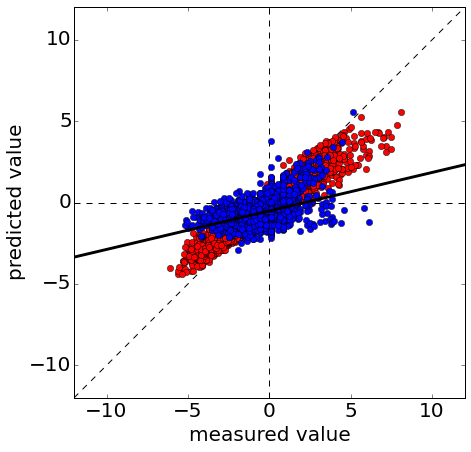

In [41]:
#from sklearn import ensemble

fst = sklearn.ensemble.RandomForestRegressor(n_estimators=20)
#fst = sklearn.ensemble.RandomForestClassifier(n_estimators=20)
fst.fit(ml.training_features, ml.training_values) 

lp.plot.correlation(ml,fst)

print("n: {:d}, r2: {:.3f}".format(fst.n_estimators,fst.score(ml.test_features,ml.test_values)))

order = np.argsort(fst.feature_importances_)
order = order[::-1]
for i in order:
    print("{:>25s}{:6.2f}".format(ml._feature_names[i],100*fst.feature_importances_[i]))
    #print("{:6.2f}".format(100*fst.feature_importances_[i]))

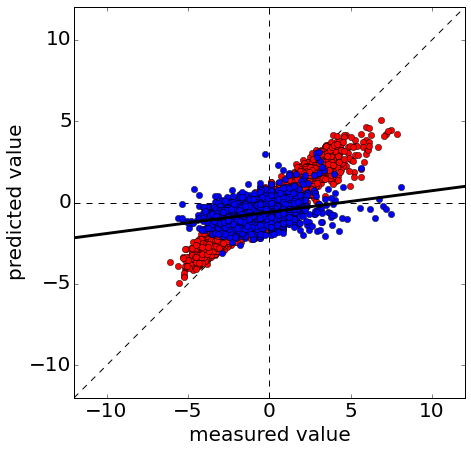

In [30]:
from sklearn import ensemble

fst = sklearn.ensemble.RandomForestRegressor(n_estimators=20) # good
#fst = sklearn.ensemble.AdaBoostRegressor() # flat
#fst = sklearn.ensemble.BaggingRegressor() # good
#fst = sklearn.ensemble.ExtraTreesRegressor(n_estimators=20) #good
#fst = sklearn.ensemble.GradientBoostingRegressor() #good
fst.fit(ml.training_features, ml.training_values) 
lp.plot.correlation(ml,fst)

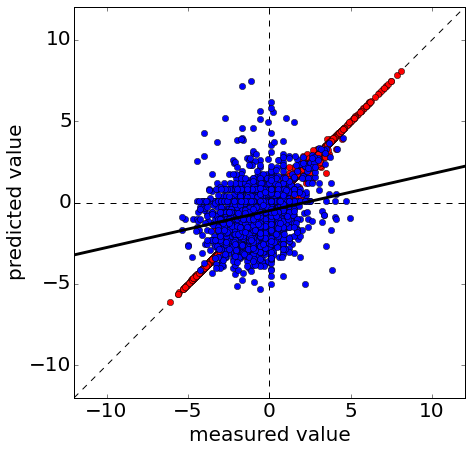

In [20]:
from sklearn import tree 
#tre = sklearn.tree.DecisionTreeRegressor() #bad
tre = sklearn.tree.ExtraTreeRegressor() #bad
tre.fit(ml.training_features, ml.training_values) 
lp.plot.correlation(ml,tre)

In [ ]:
from sklearn import linear_model
#clf = sklearn.linear_model.BayesianRidge(alpha_1=0.00001)
#clf = sklearn.linear_model.ElasticNet()
#clf = sklearn.linear_model.LassoLars(alpha=0.1)
#clf = sklearn.linear_model.Perceptron() # requires classes
#clf = sklearn.linear_model.PassiveAggressiveRegressor()
#clf = sklearn.linear_model.RANSACRegressor()
#clf = sklearn.linear_model.SGDRegressor()



clf.fit(ml.training_features, ml.training_values) 
lp.plot.correlation(ml,clf)

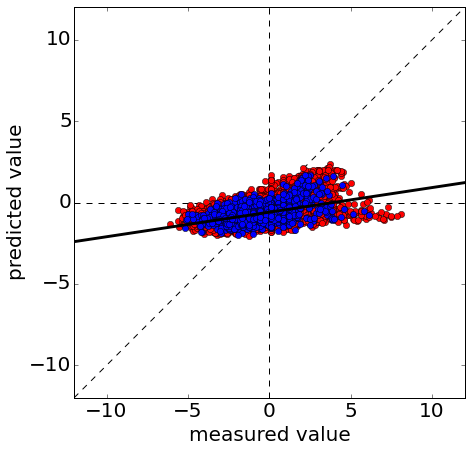

In [42]:
from sklearn import svm

#sv = sklearn.svm.SVR()
sv = sklearn.svm.NuSVR()

sv.fit(ml.training_features, ml.training_values) 
lp.plot.correlation(ml,sv)